<a href="https://colab.research.google.com/github/lokrajs/colabExercises/blob/main/ProteinClassifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf

In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/ecoli.csv

--2021-06-01 21:15:37--  https://lazyprogrammer.me/course_files/exercises/ecoli.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19487 (19K) [text/csv]
Saving to: ‘ecoli.csv’

ecoli.csv           100%[===================>]  19.03K  --.-KB/s    in 0s      

2021-06-01 21:15:38 (59.2 MB/s) - ‘ecoli.csv’ saved [19487/19487]



In [ ]:
data = pd.read_csv('ecoli.csv',header=None)
start = np.empty((1,9))
X = data.to_numpy()
for row in X:
  start = np.vstack((start,np.array(row[0].split())))
X = start[1:,1:-1]
X = X.astype(np.float)
Y = start[1:,-1]
le = preprocessing.LabelEncoder()
le = le.fit(Y)
# le.classes_
Y = le.transform(Y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33)

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(7),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.15),
      tf.keras.layers.Dense(64),
      tf.keras.layers.Dense(8,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150)

Epoch 1/150
8/8 [==============================] - 1s 24ms/step - loss: 2.0348 - accuracy: 0.3378 - val_loss: 1.8709 - val_accuracy: 0.4054
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 1.7437 - accuracy: 0.4356 - val_loss: 1.7232 - val_accuracy: 0.4054
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 1.5977 - accuracy: 0.4444 - val_loss: 1.6718 - val_accuracy: 0.4234
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 1.5095 - accuracy: 0.5467 - val_loss: 1.6565 - val_accuracy: 0.6036
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 1.4387 - accuracy: 0.6000 - val_loss: 1.6160 - val_accuracy: 0.6306
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 1.4040 - accuracy: 0.6089 - val_loss: 1.5885 - val_accuracy: 0.6306
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 1.3547 - accuracy: 0.6178 - val_loss: 1.5604 - val_accuracy: 0.6306
Epoch 8/150
8/8 [=========

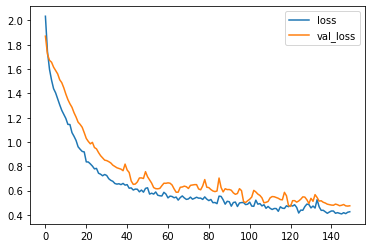

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

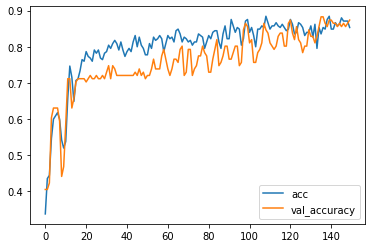

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()